poly regression
comments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NewColNames = {'crim': 'CrimeRate', 'zn': 'LargeLotsProp', 'indus': 'NonRetailProp', 'chas': 'RiverBound', 'nox': 'NitricOx', 'rm': 'AvgRooms', 'age': 'OldUnitsProp', 'dis': 'DistToJobs', 'rad': 'RadHwayAccess', 'tax': 'TaxRate', 'ptratio': 'PTRatio', 'b': 'BlackProp', 'lstat': 'LowerStatusProp', 'medv': 'HouseValue'}
houses = pd.read_csv('BostonHousing.csv')
houses.rename(columns=NewColNames, inplace=True) #Renamed Columns to make it easier to understand and read
houses.info()
houses.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CrimeRate        506 non-null    float64
 1   LargeLotsProp    506 non-null    float64
 2   NonRetailProp    506 non-null    float64
 3   RiverBound       506 non-null    int64  
 4   NitricOx         506 non-null    float64
 5   AvgRooms         501 non-null    float64
 6   OldUnitsProp     506 non-null    float64
 7   DistToJobs       506 non-null    float64
 8   RadHwayAccess    506 non-null    int64  
 9   TaxRate          506 non-null    int64  
 10  PTRatio          506 non-null    float64
 11  BlackProp        506 non-null    float64
 12  LowerStatusProp  506 non-null    float64
 13  HouseValue       506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,CrimeRate,LargeLotsProp,NonRetailProp,RiverBound,NitricOx,AvgRooms,OldUnitsProp,DistToJobs,RadHwayAccess,TaxRate,PTRatio,BlackProp,LowerStatusProp,HouseValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#Data Visualization


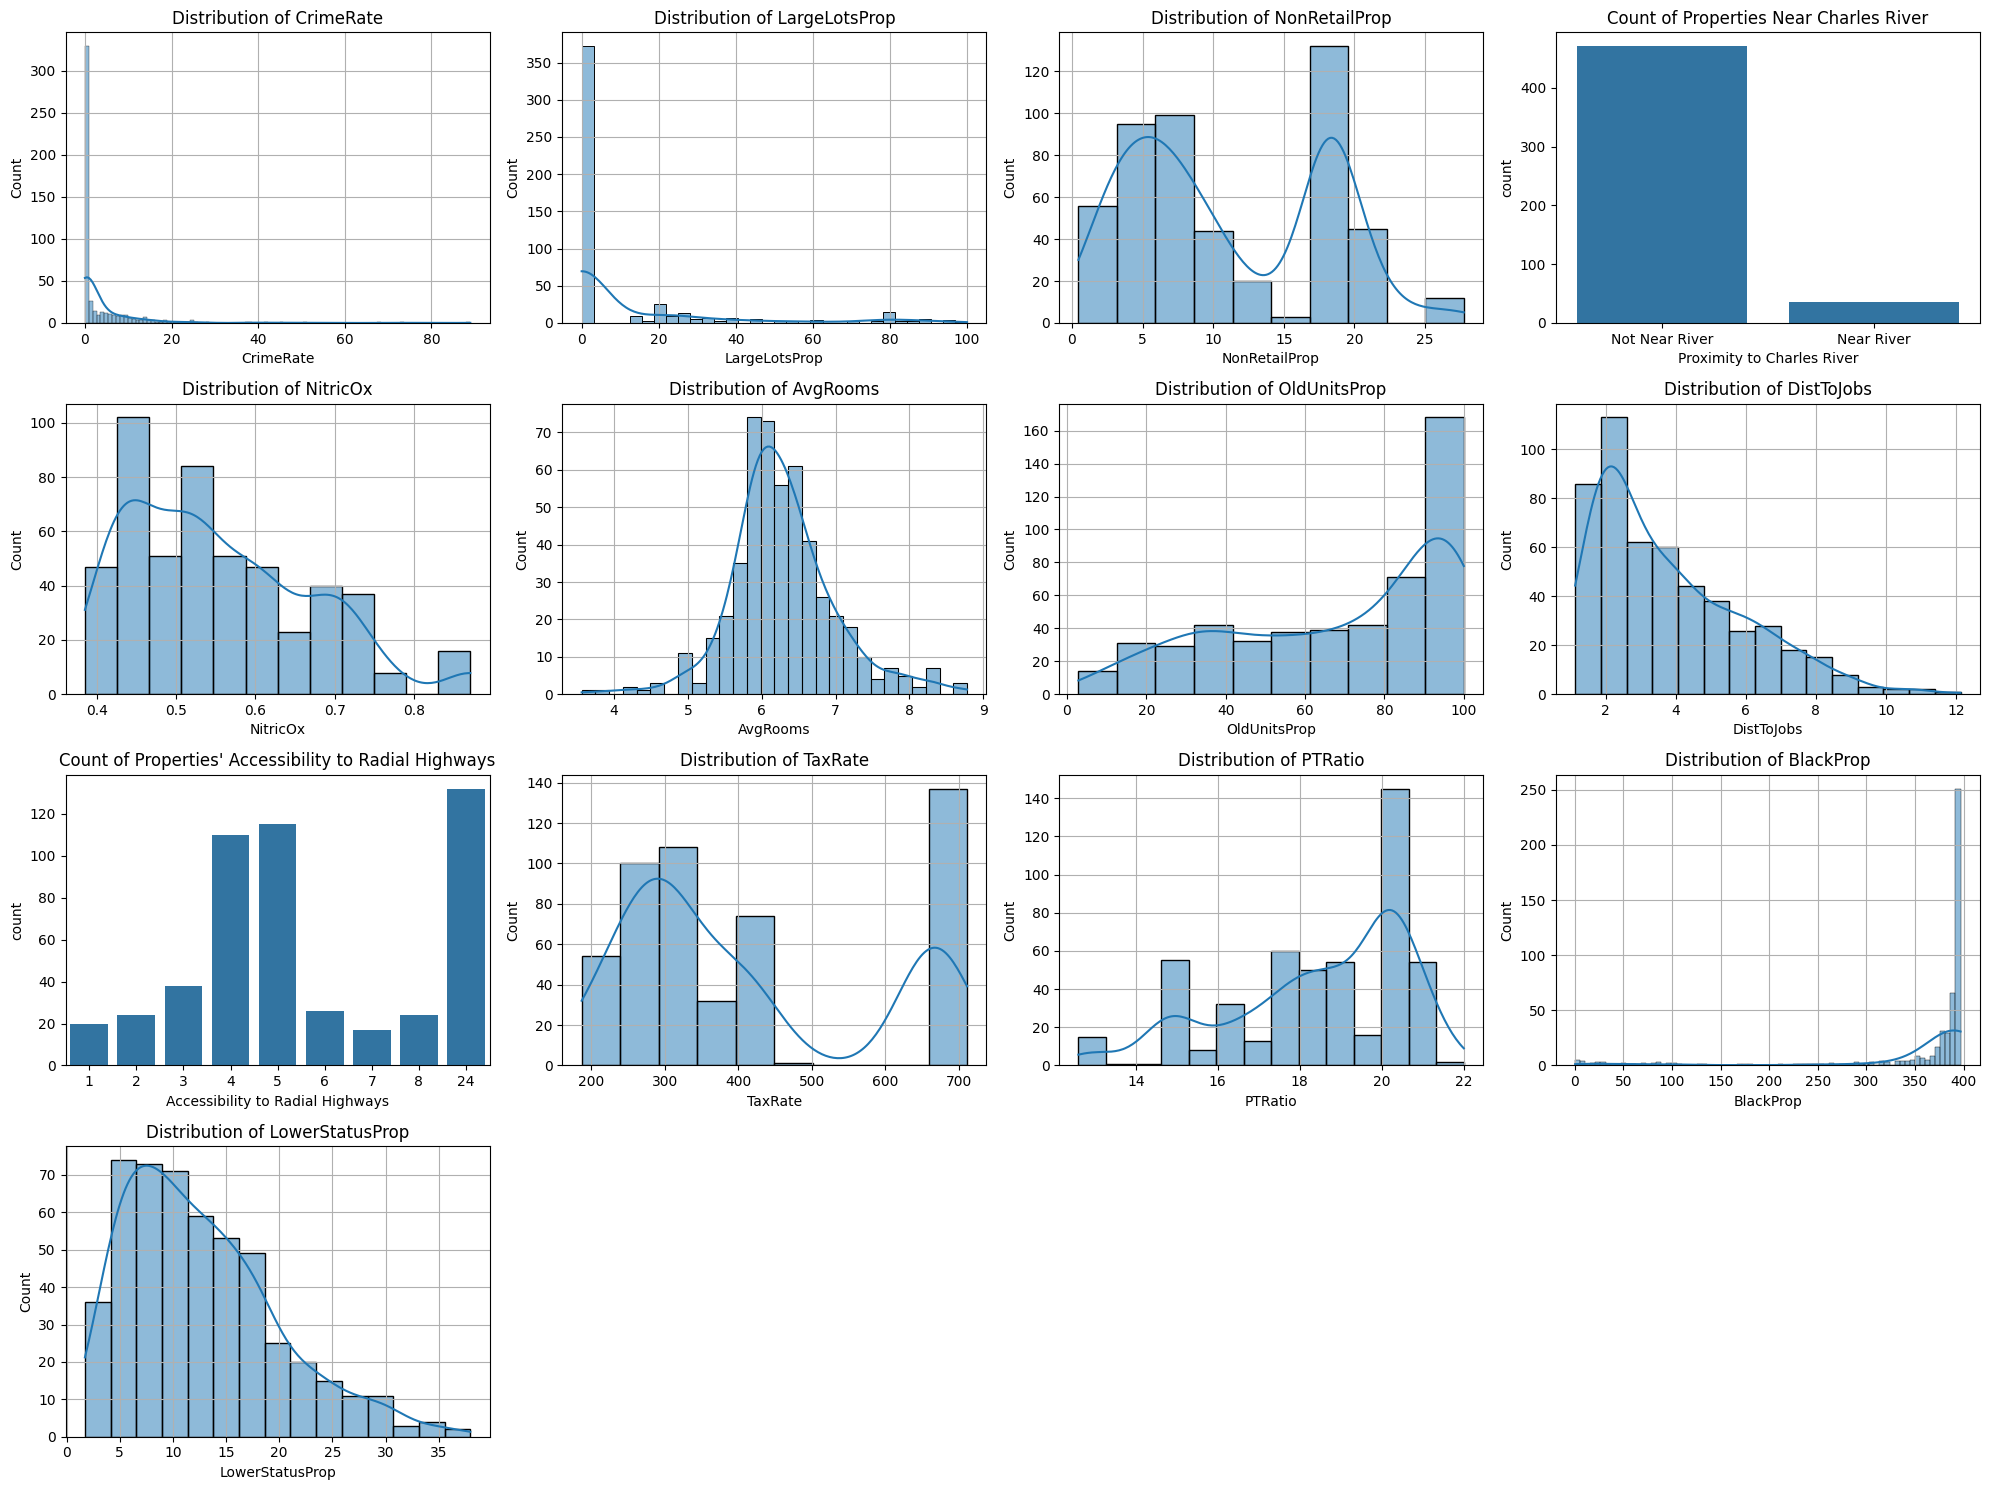

In [3]:
#Visualize the distribution of features
features = houses.columns.drop('HouseValue')
plt.figure(figsize=(20, 15))
#Create histograms for continuous features and a bar chart for RiverBound
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1) #subplot so the plots are smaller and take less space
    if feature == 'RiverBound':
        sns.countplot(x=houses[feature])
        plt.xlabel('Proximity to Charles River')
        plt.xticks([0, 1], ['Not Near River', 'Near River'])
        plt.title('Count of Properties Near Charles River')
    elif feature == 'RadHwayAccess': #RiverBound & RadHwayAccess are categorical data so we use countPlot
        sns.countplot(x=houses[feature])
        plt.xlabel('Accessibility to Radial Highways')
        plt.title("Count of Properties' Accessibility to Radial Highways")
    else:
        sns.histplot(houses[feature], kde=True) #For Numerical data we use histographs
        plt.xlabel(feature)
        plt.title(f'Distribution of {feature}')
        plt.grid(True)

plt.tight_layout()
plt.show()

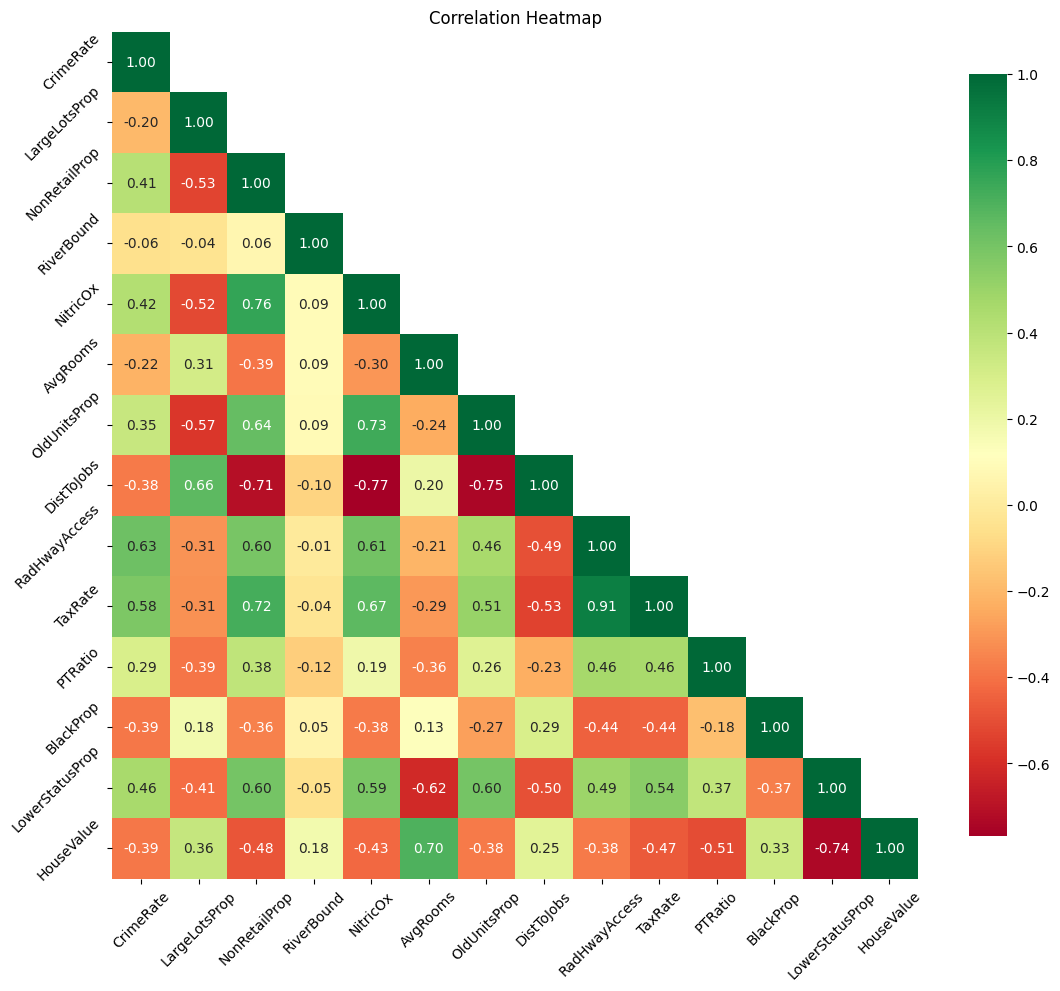

In [4]:
#Calculate the correlation matrix
correlation_matrix = houses.corr()
plt.figure(figsize=(13, 11))

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1) # k=1 so we can only see the lower part of the matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', mask=mask, cbar_kws={"shrink": .9})

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

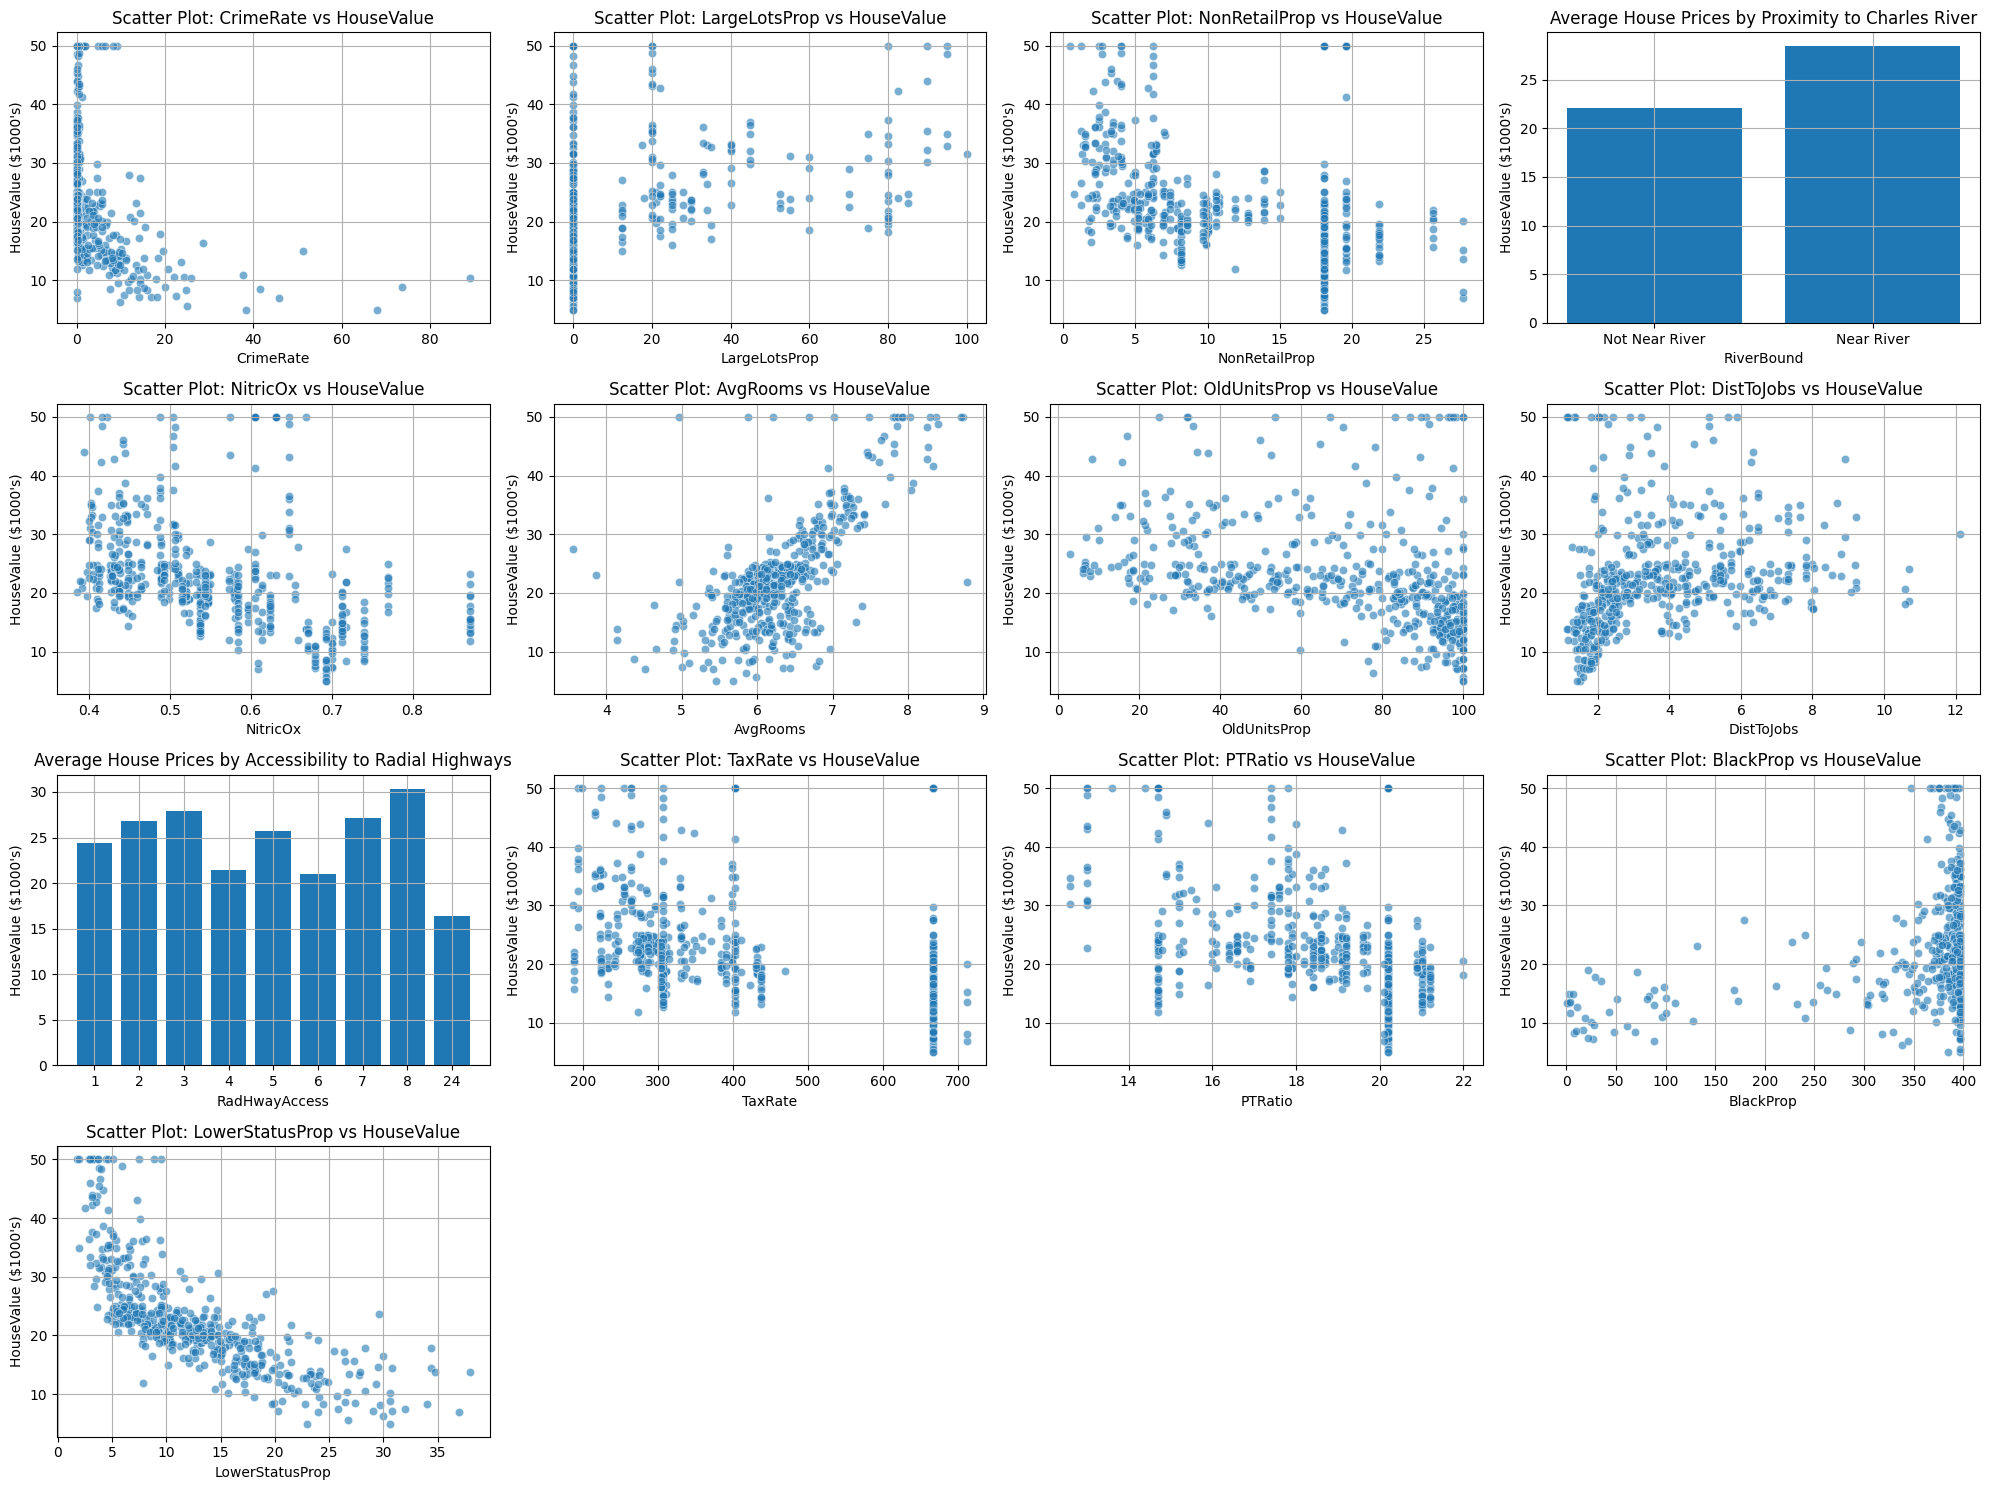

In [5]:
#Scatter plots to observe any visible trends.
plt.figure(figsize=(20, 15))
features = houses.columns.drop('HouseValue')

for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    if feature == 'RiverBound':
      average_prices = houses.groupby('RiverBound')['HouseValue'].mean().reset_index()
      plt.bar(average_prices['RiverBound'].astype(str), average_prices['HouseValue'])
      plt.xticks([0, 1], ['Not Near River', 'Near River'])
      plt.title('Average House Prices by Proximity to Charles River')
    elif feature == 'RadHwayAccess':
      average_prices = houses.groupby('RadHwayAccess')['HouseValue'].mean().reset_index() #for RiverBound & RadHwayAccess we use bar chart
      plt.bar(average_prices['RadHwayAccess'].astype(str), average_prices['HouseValue'])
      plt.title('Average House Prices by Accessibility to Radial Highways')
    else:
      sns.scatterplot(x=houses[feature], y=houses['HouseValue'], alpha=0.6) #for the rest scatter plot
      plt.title(f'Scatter Plot: {feature} vs HouseValue')

    plt.xlabel(feature)
    plt.ylabel("HouseValue ($1000's)")
    plt.grid(True)

plt.tight_layout()
plt.show()

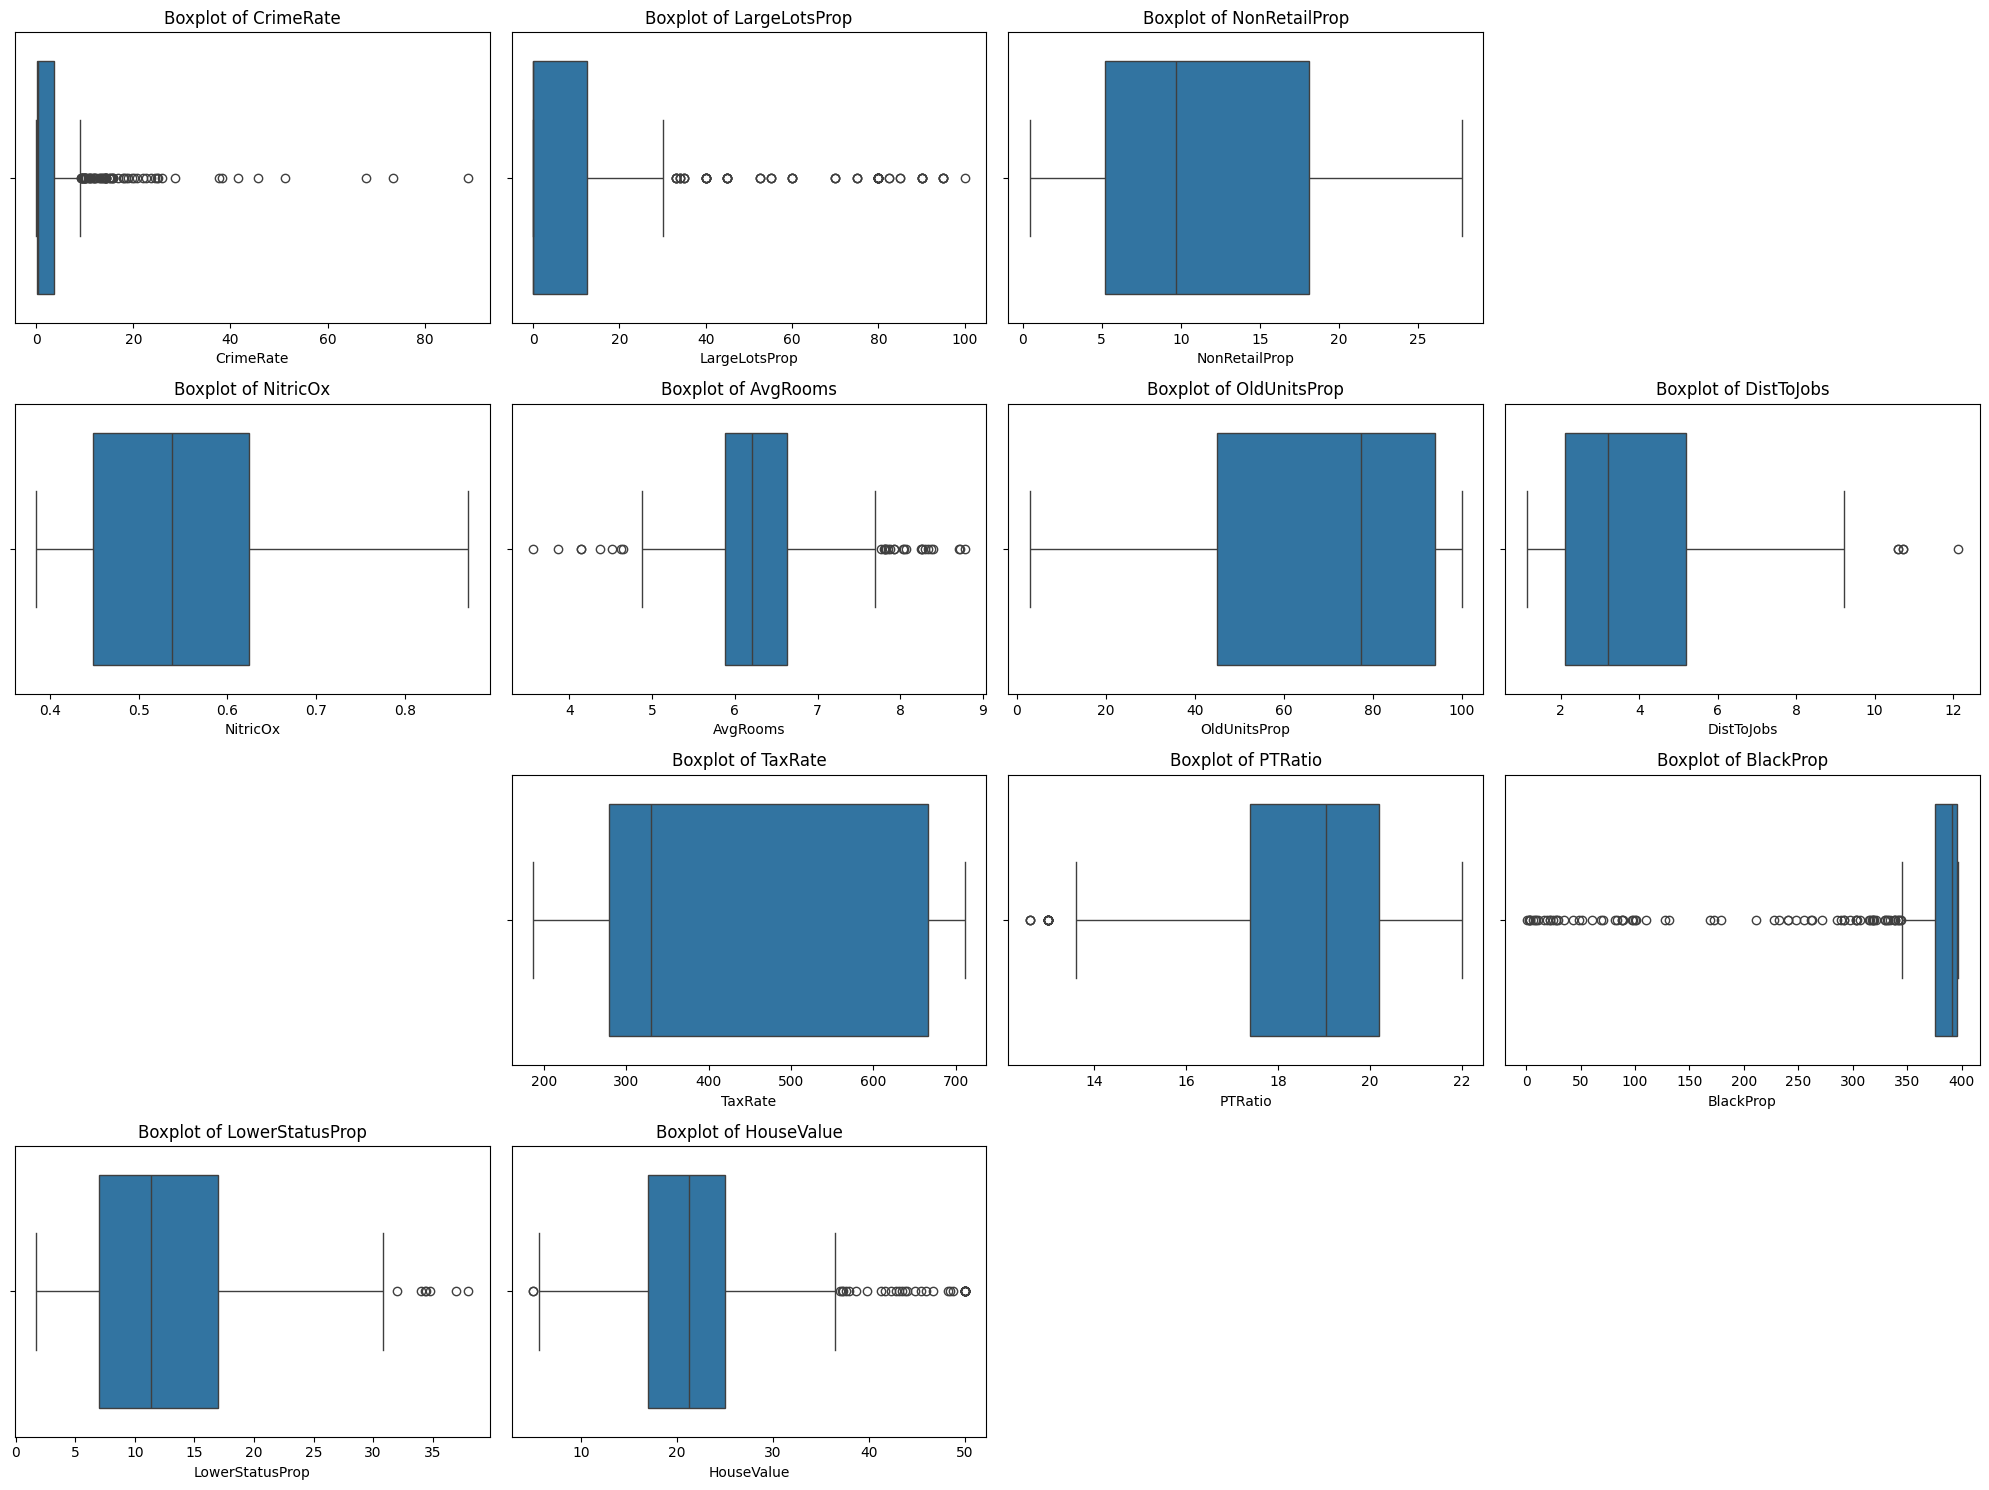

In [6]:
#Boxplots to detect outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(houses.columns):
  if col == 'RiverBound' or col == 'RadHwayAccess': pass
  else:
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=houses[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#Data Preprocessing

In [7]:
print(houses.isnull().sum())  # Shows the sum of nulls per column

avgRM = houses.AvgRooms.mean()
houses['AvgRooms'] = houses.AvgRooms.fillna(avgRM) #replaced the nulls with the mean value
print("-----------------------------------")
print(houses.isnull().sum())
print("-----------------------------------")

print(f"Duplicate sum: {houses.duplicated().sum()}")  # Shows the number of duplicate rows

CrimeRate          0
LargeLotsProp      0
NonRetailProp      0
RiverBound         0
NitricOx           0
AvgRooms           5
OldUnitsProp       0
DistToJobs         0
RadHwayAccess      0
TaxRate            0
PTRatio            0
BlackProp          0
LowerStatusProp    0
HouseValue         0
dtype: int64
-----------------------------------
CrimeRate          0
LargeLotsProp      0
NonRetailProp      0
RiverBound         0
NitricOx           0
AvgRooms           0
OldUnitsProp       0
DistToJobs         0
RadHwayAccess      0
TaxRate            0
PTRatio            0
BlackProp          0
LowerStatusProp    0
HouseValue         0
dtype: int64
-----------------------------------
Duplicate sum: 0


In [8]:
#Outliers
cols = houses.columns.drop('RiverBound')
cols = cols.drop('RadHwayAccess') #Dropped RadHwayAccess & RiverBound since they are categorical
for i in cols:
    Q1 = houses[i].quantile(0.25)
    Q3 = houses[i].quantile(0.75)

    IQR = Q3 - Q1

    mask = ((houses[i] < (Q1 - 1.5 * IQR)) | (houses[i] > (Q3 + 1.5 * IQR)))

    print(f"Number of outliers in {str(i)} {mask.sum()}") #print number of outliers in each column

    houses.loc[mask, i] = houses[i].median()

houses.describe()

Number of outliers in CrimeRate 66
Number of outliers in LargeLotsProp 68
Number of outliers in NonRetailProp 0
Number of outliers in NitricOx 0
Number of outliers in AvgRooms 30
Number of outliers in OldUnitsProp 0
Number of outliers in DistToJobs 5
Number of outliers in TaxRate 0
Number of outliers in PTRatio 15
Number of outliers in BlackProp 77
Number of outliers in LowerStatusProp 7
Number of outliers in HouseValue 40


,CrimeRate,LargeLotsProp,NonRetailProp,RiverBound,NitricOx,AvgRooms,OldUnitsProp,DistToJobs,RadHwayAccess,TaxRate,PTRatio,BlackProp,LowerStatusProp,HouseValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.075493,2.763834,11.136779,0.069170,0.554695,6.231543,68.574901,3.718598,9.549407,408.237154,18.637253,389.121798,12.326996,20.757115
std,2.009455,7.357024,6.860353,0.253994,0.115878,0.516763,28.148861,1.980432,8.707259,168.537116,1.937389,10.340151,6.632190,6.192007
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,5.600000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.899750,45.025000,2.100175,4.000000,279.000000,17.400000,388.115000,6.950000,17.100000
50%,0.255190,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.203325,5.000000,330.000000,19.075000,391.445000,11.350000,21.200000
75%,0.635910,0.000000,18.100000,0.000000,0.624000,6.512500,94.075000,5.112625,24.000000,666.000000,20.200000,396.225000,16.462500,23.800000
max,8.982960,30.000000,27.740000,1.000000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,36.500000


In [9]:
#Standardization
from sklearn.preprocessing import StandardScaler

Stand = StandardScaler()
housesTemp = houses.copy().drop('RiverBound', axis = 1)
housesTemp = housesTemp.drop('RadHwayAccess', axis = 1) #Only standardize numerical not categrocial so RadHwayAccess & RiverBound are dropped
housesTemp = housesTemp.drop('HouseValue', axis = 1)
housesSTD = pd.DataFrame(Stand.fit_transform(housesTemp), columns=[col + '_std' for col in housesTemp.columns]) #col + '_std' adds '_std' at the end of each col name to differentiate between it and 'houses' columns
pd.concat([housesSTD], axis=1)

,CrimeRate_std,LargeLotsProp_std,NonRetailProp_std,NitricOx_std,AvgRooms_std,OldUnitsProp_std,DistToJobs_std,TaxRate_std,PTRatio_std,BlackProp_std,LowerStatusProp_std
0,-0.532598,2.073018,-1.287909,-0.144217,0.665290,-0.120013,0.187722,-0.666608,-1.724257,0.752977,-1.108875
1,-0.522142,-0.376045,-0.593381,-0.740262,0.366986,0.367166,0.631043,-0.987329,-0.432583,0.752977,-0.481010
2,-0.522152,-0.376045,-0.593381,-0.740262,1.846884,-0.265812,0.631043,-0.987329,-0.432583,0.358976,-1.252257
3,-0.519621,-0.376045,-1.306878,-0.835284,1.484657,-0.809889,1.184550,-1.106115,0.032419,0.533227,-1.416770
4,-0.501350,-0.376045,-1.306878,-0.835284,1.773276,-0.511180,1.184550,-1.106115,0.032419,0.752977,-1.056049
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.504548,-0.376045,0.115738,0.158124,0.700157,0.018673,-0.626744,-0.803212,1.220759,0.277659,-0.401018
502,-0.513195,-0.376045,0.115738,0.158124,-0.216063,0.288933,-0.723334,-0.803212,1.220759,0.752977,-0.490066
503,-0.505479,-0.376045,0.115738,0.158124,1.442043,0.797449,-0.783987,-0.803212,1.220759,0.752977,-1.009261
504,-0.481155,-0.376045,0.115738,0.158124,1.089501,0.736996,-0.672082,-0.803212,1.220759,0.418996,-0.882481


#Feature Selection

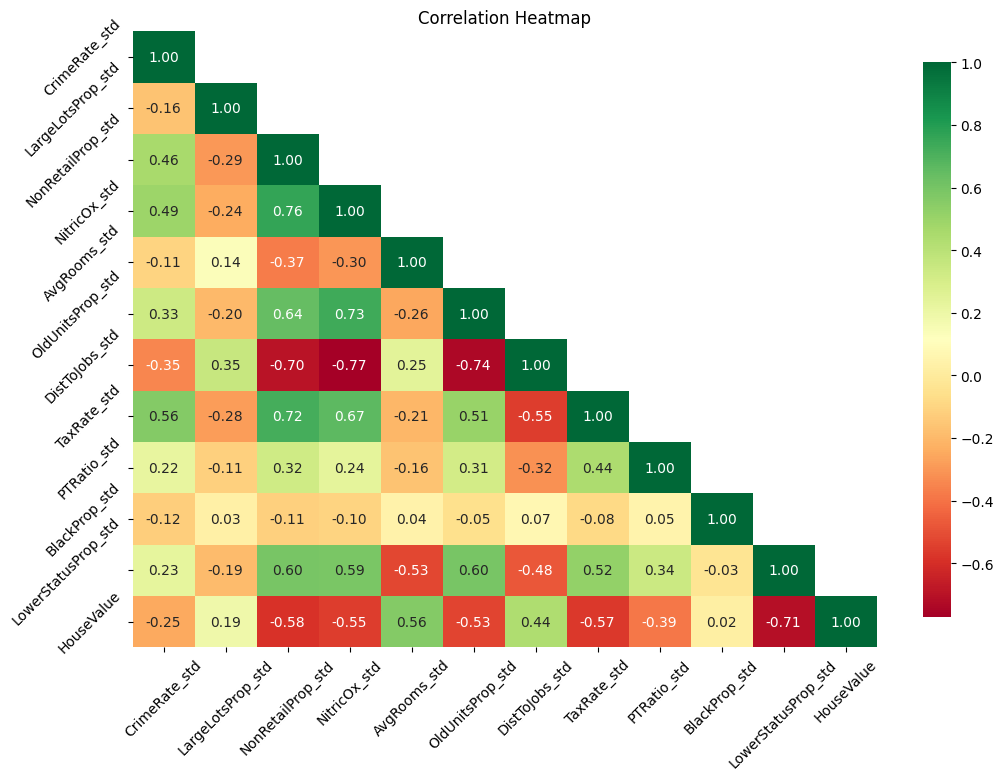

In [11]:
housesSTD['HouseValue'] = houses['HouseValue']

correlation_matrix = housesSTD.corr() #correlation matric of standardized data
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', mask=mask, cbar_kws={"shrink": .9})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [67]:
target = 'HouseValue'
alpha = 0.5
cor = housesSTD.corr()
cor_target = abs(cor[target])
relevant_features = cor_target[cor_target>=alpha] #feature selection. only pick features with higher correlation than the value of alpha
relevant_features.drop('HouseValue', inplace = True)
housesSTD[relevant_features.index]

,NonRetailProp_std,NitricOx_std,AvgRooms_std,OldUnitsProp_std,TaxRate_std,LowerStatusProp_std
0,-1.287909,-0.144217,0.665290,-0.120013,-0.666608,-1.108875
1,-0.593381,-0.740262,0.366986,0.367166,-0.987329,-0.481010
2,-0.593381,-0.740262,1.846884,-0.265812,-0.987329,-1.252257
3,-1.306878,-0.835284,1.484657,-0.809889,-1.106115,-1.416770
4,-1.306878,-0.835284,1.773276,-0.511180,-1.106115,-1.056049
...,...,...,...,...,...,...
501,0.115738,0.158124,0.700157,0.018673,-0.803212,-0.401018
502,0.115738,0.158124,-0.216063,0.288933,-0.803212,-0.490066
503,0.115738,0.158124,1.442043,0.797449,-0.803212,-1.009261
504,0.115738,0.158124,1.089501,0.736996,-0.803212,-0.882481


#Linear Regression Model


In [68]:
from sklearn.model_selection import train_test_split

features = housesSTD[relevant_features.index].copy()
target = housesSTD["HouseValue"].copy()
pd.concat([features,target], axis=1)

,NonRetailProp_std,NitricOx_std,AvgRooms_std,OldUnitsProp_std,TaxRate_std,LowerStatusProp_std,HouseValue
0,-1.287909,-0.144217,0.665290,-0.120013,-0.666608,-1.108875,24.0
1,-0.593381,-0.740262,0.366986,0.367166,-0.987329,-0.481010,21.6
2,-0.593381,-0.740262,1.846884,-0.265812,-0.987329,-1.252257,34.7
3,-1.306878,-0.835284,1.484657,-0.809889,-1.106115,-1.416770,33.4
4,-1.306878,-0.835284,1.773276,-0.511180,-1.106115,-1.056049,36.2
...,...,...,...,...,...,...,...
501,0.115738,0.158124,0.700157,0.018673,-0.803212,-0.401018,22.4
502,0.115738,0.158124,-0.216063,0.288933,-0.803212,-0.490066,20.6
503,0.115738,0.158124,1.442043,0.797449,-0.803212,-1.009261,23.9
504,0.115738,0.158124,1.089501,0.736996,-0.803212,-0.882481,22.0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 5) #80/20 split
X_train

,NonRetailProp_std,NitricOx_std,AvgRooms_std,OldUnitsProp_std,TaxRate_std,LowerStatusProp_std
33,-0.437258,-0.144217,-1.027682,0.939692,-0.601276,0.909046
283,-1.448410,-1.327669,-0.041729,-1.556661,-1.248658,-1.383565
418,1.015999,1.073787,-0.531800,1.117494,1.530926,1.251655
502,0.115738,0.158124,-0.216063,0.288933,-0.803212,-0.490066
402,1.015999,1.194724,0.334056,1.117494,1.530926,1.204867
...,...,...,...,...,...,...
486,1.015999,0.244507,-0.227685,0.399171,1.530926,0.400415
189,-1.123032,-1.016689,1.846884,-1.055256,-0.060801,-1.046994
495,-0.211099,0.261784,-1.087731,-1.414418,-0.102376,0.795849
206,-0.079780,-0.567496,0.182967,-0.571633,-0.779455,-0.204810


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train) # Training

predict = model.predict(X_test)

r2_1 = model.score(X_test, y_test) #R-Squared
mse_1 = mean_squared_error(y_test, predict) #Mean Squared Error
mae_1 = mean_absolute_error(y_test, predict) #Mean Absolute Error

#evaluate Training
print('coefficient of determination (R² Score):', r2_1)

#evaluate Testing
print(f"errors in predictions(MAE): {mae_1}")
print(f'Mean Squared Error(MSE): {mse_1}')

coefficient of determination (R² Score): 0.6906779821929446
errors in predictions(MAE): 2.5749296000728648
Mean Squared Error(MSE): 11.657900885147619


In [79]:
from sklearn.model_selection import cross_val_score,cross_val_predict

klist = [2, 3,5,7,9, 10]
for k in klist:
    model = LinearRegression()
    errors = cross_val_score(model, features, target, scoring='neg_mean_absolute_error', cv=k)
    prediction = cross_val_predict(model, features, target, cv=k)
    error = abs(errors.mean())
    print(f"Cross validation k = {k}","\nError: ", error )
    print("******************************")

Cross validation k = 2 
Error:  3.1820356755287356
******************************
Cross validation k = 3 
Error:  3.3731467974349667
******************************
Cross validation k = 5 
Error:  3.212259358912921
******************************
Cross validation k = 7 
Error:  3.281512990619286
******************************
Cross validation k = 9 
Error:  3.299847955080802
******************************
Cross validation k = 10 
Error:  3.317021087037059
******************************


#Polynomial Regression

In [73]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2  #polynomial degree
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_pred = model.predict(X_poly_test)

mse_2 = mean_squared_error(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

#evaluate Training
print('coefficient of determination (R² Score):', r2_2)

#evaluate Testing
print(f"errors in predictions(MAE): {mae_2}")
print(f'Mean Squared Error(MSE): {mse_2}')

coefficient of determination (R² Score): 0.6961784602986549
errors in predictions(MAE): 2.4025443738828223
Mean Squared Error(MSE): 11.450595795675152


In [74]:
print(f"Linear regression performance metrics:\ncoefficient of determination (R² Score): {r2_1}\nerrors in predictions(MAE): {mae_1}\nMean Squared Error(MSE): {mse_1}")
print("-------------------------------------------------------------")
print(f"Polynomial regression performance metrics:\ncoefficient of determination (R² Score): {r2_2}\nerrors in predictions(MAE): {mae_2}\nMean Squared Error(MSE): {mse_2}\n")

Linear regression performance metrics:
coefficient of determination (R² Score): 0.6906779821929446
errors in predictions(MAE): 2.5749296000728648
Mean Squared Error(MSE): 11.657900885147619
-------------------------------------------------------------
Polynomial regression performance metrics:
coefficient of determination (R² Score): 0.6961784602986549
errors in predictions(MAE): 2.4025443738828223
Mean Squared Error(MSE): 11.450595795675152



In [75]:
#Polynomial Regression gave better accuracy than Linear Regression